## Autores:
## Ignacio Diaz, Daniel Godoy, Camila Vargas
## Herramientas Computacionales
## 2020

Nota: Cambiar aquellas direcciones que correspondan a un drive. (Archivos de alto peso). Paths a github mantener igual.

In [1]:
import pandas as pd
import numpy as np

# Importacion Data DEFUNCIONES

IMPORTEMOS Y LIMPIAMOS LA DATAFRAME DE DEFUNCIONES 



In [2]:
df = pd.read_csv('/content/drive/My Drive/Datos/Herramientas Computacionales/data/DEFUNCIONES_FUENTE_DEIS_2016_2020_03092020.csv',delimiter=';',encoding='latin1')
df2 = pd.read_excel('/content/drive/My Drive/Datos/Herramientas Computacionales/data/Diccionario de Datos BBDD-COVID19 liberada.xlsx')
name_variables = []
for i in range (3,len(df2)):
    name_variables.append(df2.loc[i][2])
dfinal = df
dfinal.columns = name_variables
dfinal

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,GLOSA_CATEGORIA_DIAG1,CODIGO_SUBCATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2
0,2020,2020-06-28,Hombre,1,89,13103,Cerro Navia,Metropolitana de Santiago,I10X,I00-I99,Enfermedades del sistema circulatorio,I10-I15,Enfermedades hipertensivas,I10,HipertensiÃ³n esencial (primaria),I10X,HIPERTENSION ESENCIAL (PRIMARIA),,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,2020-06-21,Hombre,1,92,13110,La Florida,Metropolitana de Santiago,R99X,R00-R99,"SÃ­ntomas, signos y hallazgos anormales clÃ­ni...",R95-R99,Causas de mortalidad mal definidas y desconocidas,R99,Otras causas mal definidas y las no especifica...,R99X,OTRAS CAUSAS MAL DEFINIDAS Y LAS NO ESPECIFICA...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2020-05-21,Hombre,1,95,13110,La Florida,Metropolitana de Santiago,J449,J00-J99,Enfermedades del sistema respiratorio,J40-J47,Enfermedades crÃ³nicas de las vÃ­as respirator...,J44,Otras enfermedades pulmonares obstructivas crÃ...,J449,"ENFERMEDAD PULMÃNAR OBSTRUCTIVA CRONICA, NO E...",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,2020-08-13,Mujer,1,93,13111,La Granja,Metropolitana de Santiago,R99X,R00-R99,"SÃ­ntomas, signos y hallazgos anormales clÃ­ni...",R95-R99,Causas de mortalidad mal definidas y desconocidas,R99,Otras causas mal definidas y las no especifica...,R99X,OTRAS CAUSAS MAL DEFINIDAS Y LAS NO ESPECIFICA...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,2020-06-12,Mujer,1,93,15101,Arica,De Arica y Parinacota,I110,I00-I99,Enfermedades del sistema circulatorio,I10-I15,Enfermedades hipertensivas,I11,Enfermedad cardÃ­aca hipertensiva,I110,ENFERMEDAD CARDIACA HIPERTENSIVA CON INSUFICIE...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512725,2016,2016-06-29,Mujer,1,63,13122,PeÃ±alolÃ©n,Metropolitana de Santiago,D374,C00-D48,Tumores [Neoplasias],D37-D48,Tumores [neoplasias] de comportamiento inciert...,D37,Tumor de comportamiento incierto o desconocido...,D374,TUMOR DE COMPORTAMIENTO INCIERTO O DESCONOCIDO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512726,2016,2016-09-18,Hombre,1,60,8102,Coronel,Del BÃ­obÃ­o,C220,C00-D48,Tumores [Neoplasias],C15-C26,Tumores malignos de los Ã³rganos digestivos,C22,Tumor maligno del hÃ­gado y de las vÃ­as bilia...,C220,CARCINOMA DE CÃLULAS HEPÃTICAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512727,2016,2016-09-21,Hombre,1,88,8102,Coronel,Del BÃ­obÃ­o,N185,N00-N99,Enfermedades del sistema genitourinario,N17-N19,Insuficiencia renal,N18,Enfermedad (Insuficiencia) renal crÃ³nica,N185,"ENFERMEDAD RENAL CRÃNICA, ESTADIO 5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512728,2016,2016-09-14,Hombre,1,68,8309,Quilleco,Del BÃ­obÃ­o,I619,I00-I99,Enfermedades del sistema circulatorio,I60-I69,Enfermedades cerebrovasculares,I61,Hemorragia intraencefÃ¡lica,I619,"HEMORRAGIA INTRAENCEFALICA, NO ESPECIFICADA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#TOMEMOS SOLO LAS MUERTES PRODUCTO DE COVID19

covid1=dfinal['DIAG1']=='U071' #con virus identificado
covid2=dfinal['DIAG1']=='U072' #sin virus identificado
dfc=dfinal[covid1|covid2]

In [4]:
#CHEQUEAMOS QUE NO HAY DATOS QUE NO APORTEN.
dfc[dfc['CODIGO_COMUNA_RESIDENCIA']==99999]

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,GLOSA_CATEGORIA_DIAG1,CODIGO_SUBCATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2
41611,2020,2020-05-27,Hombre,1,73,99999,Ignorada,Ignorada,U071,U00-U99,CÃ³digos para propÃ³sitos especiales,U00-U49,AsignaciÃ³n provisoria de nuevas afecciones de...,U07,Uso emergente de U07,U071,"COVID-19, virus identificado",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77405,2020,2020-06-25,Hombre,1,33,99999,Ignorada,Ignorada,U072,U00-U99,CÃ³digos para propÃ³sitos especiales,U00-U49,AsignaciÃ³n provisoria de nuevas afecciones de...,U07,Uso emergente de U07,U072,"COVID-19, virus no identificado",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfc=dfc[dfc['CODIGO_COMUNA_RESIDENCIA']!=99999]
dfc #Muertos por COVID-19

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,GLOSA_CATEGORIA_DIAG1,CODIGO_SUBCATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2
38,2020,2020-06-16,Mujer,1,97,13110,La Florida,Metropolitana de Santiago,U072,U00-U99,CÃ³digos para propÃ³sitos especiales,U00-U49,AsignaciÃ³n provisoria de nuevas afecciones de...,U07,Uso emergente de U07,U072,"COVID-19, virus no identificado",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2020,2020-06-12,Hombre,1,81,13103,Cerro Navia,Metropolitana de Santiago,U071,U00-U99,CÃ³digos para propÃ³sitos especiales,U00-U49,AsignaciÃ³n provisoria de nuevas afecciones de...,U07,Uso emergente de U07,U071,"COVID-19, virus identificado",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,2020,2020-06-05,Hombre,1,90,13110,La Florida,Metropolitana de Santiago,U071,U00-U99,CÃ³digos para propÃ³sitos especiales,U00-U49,AsignaciÃ³n provisoria de nuevas afecciones de...,U07,Uso emergente de U07,U071,"COVID-19, virus identificado",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,2020,2020-06-16,Hombre,1,88,13110,La Florida,Metropolitana de Santiago,U071,U00-U99,CÃ³digos para propÃ³sitos especiales,U00-U49,AsignaciÃ³n provisoria de nuevas afecciones de...,U07,Uso emergente de U07,U071,"COVID-19, virus identificado",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,2020,2020-07-20,Hombre,1,91,13103,Cerro Navia,Metropolitana de Santiago,U071,U00-U99,CÃ³digos para propÃ³sitos especiales,U00-U49,AsignaciÃ³n provisoria de nuevas afecciones de...,U07,Uso emergente de U07,U071,"COVID-19, virus identificado",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120919,2020,2020-07-14,Hombre,1,47,13126,Quinta Normal,Metropolitana de Santiago,U072,U00-U99,CÃ³digos para propÃ³sitos especiales,U00-U49,AsignaciÃ³n provisoria de nuevas afecciones de...,U07,Uso emergente de U07,U072,"COVID-19, virus no identificado",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120920,2020,2020-06-26,Hombre,3,2,13116,Lo Espejo,Metropolitana de Santiago,U072,U00-U99,CÃ³digos para propÃ³sitos especiales,U00-U49,AsignaciÃ³n provisoria de nuevas afecciones de...,U07,Uso emergente de U07,U072,"COVID-19, virus no identificado",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120921,2020,2020-06-05,Hombre,1,63,13126,Quinta Normal,Metropolitana de Santiago,U071,U00-U99,CÃ³digos para propÃ³sitos especiales,U00-U49,AsignaciÃ³n provisoria de nuevas afecciones de...,U07,Uso emergente de U07,U071,"COVID-19, virus identificado",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120922,2020,2020-06-21,Hombre,1,73,13116,Lo Espejo,Metropolitana de Santiago,U072,U00-U99,CÃ³digos para propÃ³sitos especiales,U00-U49,AsignaciÃ³n provisoria de nuevas afecciones de...,U07,Uso emergente de U07,U072,"COVID-19, virus no identificado",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Importacion Data CASOS TOTALES

In [6]:
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto33/IndiceDeMovilidad-IM_interno.csv'
dfm = pd.read_csv(url) #Movilidad
url ='https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto2/2020-09-09-CasosConfirmados.csv'
dftc= pd.read_csv(url) #Casos totales por comuna

In [7]:
dfm#Movimiento por comuna

,Region,Codigo region,Comuna,Codigo comuna,Superficie_km2,Poblacion,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,...,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30
0,Antofagasta,2,Antofagasta,2101,30683.50,425725.0,6.894829,6.814714,6.920880,6.306259,5.573810,7.061500,7.270621,7.291869,7.422381,7.509298,6.436657,5.875503,7.198359,7.602912,7.353445,7.444056,7.593088,6.449143,5.682316,6.863539,6.297780,6.172194,5.676879,5.347136,4.595987,3.991323,5.203967,5.164701,5.118159,5.092960,5.253938,4.683112,4.047139,5.332395,...,6.608778,6.433259,6.659922,5.962027,5.404345,6.885538,6.626217,6.695344,6.690194,6.959127,6.528235,5.559418,6.966295,6.947721,6.954171,6.887177,7.064918,6.490892,5.755461,7.122008,7.030863,7.103598,7.158778,7.441843,6.665994,6.162328,7.333346,7.329408,7.439825,7.487944,7.584762,6.835470,5.952551,7.486014,7.667944,7.871096,7.608138,7.782425,7.109243,6.204064
1,Antofagasta,2,Calama,2201,15533.20,190336.0,5.631362,5.599012,5.549790,5.055584,4.694785,5.896700,6.008095,6.046580,6.125114,5.976028,5.039906,4.624262,6.122245,6.277267,6.105459,6.174222,6.134288,5.190923,4.689644,5.507299,5.181322,5.135452,4.823336,4.675869,4.059532,3.605374,4.455635,4.090803,4.108384,4.179561,4.289650,3.796268,3.281271,4.249716,...,4.921528,4.880101,4.972098,4.491532,4.079384,5.102258,5.247266,5.225097,5.285870,5.322974,4.809802,4.311125,5.321181,5.414854,5.389245,5.323268,5.429789,4.922439,4.388775,5.463219,5.464748,5.456545,5.599759,5.685199,5.144184,4.761908,5.667617,5.665324,5.854698,5.977655,5.863225,5.251793,4.651917,5.901623,6.083324,6.171586,6.162266,6.149036,5.564036,4.980007
2,Antofagasta,2,María Elena,2302,12330.10,6814.0,1.984456,1.723033,1.710316,1.562412,1.570890,1.806406,1.908149,1.878474,1.758361,1.797456,1.681583,1.510598,1.835139,2.017428,3.227979,3.713142,1.788507,1.555817,1.427226,1.815356,1.820537,1.765897,1.501649,1.453132,1.161564,0.976919,1.334432,1.449364,1.492228,1.294866,1.318888,1.282148,1.004710,1.334432,...,2.186239,1.952294,1.881193,1.597248,1.472477,1.998165,2.144037,2.285321,2.054587,1.823853,1.712844,1.551376,1.947706,2.261468,2.193119,1.872477,1.898624,1.779817,1.525229,1.997706,2.266055,2.324312,2.023853,1.995413,1.816972,1.515596,2.072936,2.343119,2.422018,2.181651,2.061009,1.772936,1.631651,2.079358,2.411009,2.622477,2.584862,2.432110,2.171101,1.941284
3,Antofagasta,2,Mejillones,2102,3576.07,14776.0,4.619588,4.715052,4.707423,4.453196,3.954639,3.491340,3.797113,4.472577,4.486392,4.609072,4.100412,3.614433,4.451753,4.684124,4.514639,4.687423,4.976082,3.836289,3.394433,4.394845,4.154845,4.220619,3.943918,3.691134,2.752784,2.348041,3.309485,3.247835,3.174021,3.180000,3.158557,2.497113,2.155876,3.190103,...,4.058040,4.078911,3.791692,3.179090,2.764460,4.284834,4.273107,4.321209,4.366925,4.408865,3.394355,2.842775,4.244285,4.292188,4.361360,4.169946,4.256808,3.310475,2.841582,4.301332,4.513814,4.559531,4.506062,4.625721,3.319817,2.869012,4.621745,4.383820,4.597496,4.348241,4.441860,3.290996,2.939575,4.509839,4.750547,4.830650,4.830650,4.421387,2.403896,2.668853
4,Antofagasta,2,Ollagüe,2202,2925.54,287.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.647059,0.500000,1.147059,0.676471,0.735294,0.823529,0.588235,0.500000,0.794118,0.764706,0.764706,0.529412,1.000000,0.617647

In [8]:
dftc

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Casos Confirmados
0,Arica y Parinacota,15,Arica,15101.0,247552.0,7344.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,26.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,63.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,57.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,24.0
...,...,...,...,...,...,...
357,Magallanes,12,Rio Verde,12103.0,211.0,0.0
358,Magallanes,12,San Gregorio,12104.0,681.0,2.0
359,Magallanes,12,Timaukel,12303.0,282.0,0.0
360,Magallanes,12,Torres del Paine,12402.0,1021.0,0.0


In [9]:
dftc[dftc['Codigo comuna'].isnull()]

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Casos Confirmados
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,24.0
12,Tarapacá,1,Desconocido Tarapaca,NaN,NaN,457.0
22,Antofagasta,2,Desconocido Antofagasta,NaN,NaN,285.0
32,Atacama,3,Desconocido Atacama,NaN,NaN,36.0
48,Coquimbo,4,Desconocido Coquimbo,NaN,NaN,140.0
87,Valparaíso,5,Desconocido Valparaiso,NaN,NaN,436.0
140,Metropolitana,13,Desconocido Metropolitana,NaN,NaN,14929.0
174,O’Higgins,6,Desconocido O’Higgins,NaN,NaN,48.0
205,Maule,7,Desconocido Maule,NaN,NaN,7.0
227,Ñuble,16,Desconocido Nuble,NaN,NaN,3.0


# Trabajemos la Data

#Metrica: Tasa Mortalidad

Ahora trabajemos la data, que ya esta seudo limpia:

In [10]:
muertos_comuna = dfc.groupby('CODIGO_COMUNA_RESIDENCIA').count()
muertos_comuna

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,GLOSA_CATEGORIA_DIAG1,CODIGO_SUBCATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2
CODIGO_COMUNA_RESIDENCIA,,,,,,,,,,,,,,,,,,,,,,,,,
1101,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,8,0,0,0,0,0,0,0,0
1107,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,2,0,0,0,0,0,0,0,0
1401,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,1,0,0,0,0,0,0,0,0
1402,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0
1403,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16207,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0
16301,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0,0,0,0
16302,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,0,0,0,0,0,0,0,0


In [11]:
#Tomemeos solo la poblacion de la dataframe de movilidad:
poblacion_comuna = dfm.iloc[:,0:6]
poblacion_comuna

,Region,Codigo region,Comuna,Codigo comuna,Superficie_km2,Poblacion
0,Antofagasta,2,Antofagasta,2101,30683.50,425725.0
1,Antofagasta,2,Calama,2201,15533.20,190336.0
2,Antofagasta,2,María Elena,2302,12330.10,6814.0
3,Antofagasta,2,Mejillones,2102,3576.07,14776.0
4,Antofagasta,2,Ollagüe,2202,2925.54,287.0
...,...,...,...,...,...,...
339,Ñuble,16,San Ignacio,16108,363.25,16624.0
340,Ñuble,16,San Nicolás,16305,565.94,12172.0
341,Ñuble,16,Treguaco,16207,313.00,5696.0
342,Ñuble,16,Yungay,16109,824.72,18596.0


In [12]:
union = pd.merge(muertos_comuna,poblacion_comuna,how='outer',left_on='CODIGO_COMUNA_RESIDENCIA', right_on='Codigo comuna')
union

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,GLOSA_CATEGORIA_DIAG1,CODIGO_SUBCATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,Region,Codigo region,Comuna,Codigo comuna,Superficie_km2,Poblacion
0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tarapacá,1,Iquique,1101,2289.53,223463.0
1,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tarapacá,1,Alto Hospicio,1107,571.19,129999.0
2,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tarapacá,1,Pozo Almonte,1401,13765.80,17395.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tarapacá,1,Camiña,1402,2199.83,1375.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tarapacá,1,Colchane,1403,4007.84,1583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Valparaíso,5,Isla de Pascua,5201,163.83,8277.0
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Valparaíso,5,Juan Fernández,5104,110.55,1033.0
341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ñuble,16,Cobquecura,16202,569.21,5275.0
342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ñuble,16,Pinto,16106,1102.70,11880.0


In [13]:
#Chequeemos si no hay datos nulos:
print(union[union['Comuna'].isna()])
print(union[union['ANO_DEF'].isna()])

Empty DataFrame
Columns: [ANO_DEF, FECHA_DEF, GLOSA_SEXO, EDAD_TIPO, EDAD_CANT, GLOSA_COMUNA_RESIDENCIA, GLOSA_REG_RES, DIAG1, CAPITULO_DIAG1, GLOSA_CAPITULO_DIAG1, CODIGO_GRUPO_DIAG1, GLOSA_GRUPO_DIAG1, CODIGO_CATEGORIA_DIAG1, GLOSA_CATEGORIA_DIAG1, CODIGO_SUBCATEGORIA_DIAG1, GLOSA_SUBCATEGORIA_DIAG1, DIAG2, CAPITULO_DIAG2, GLOSA_CAPITULO_DIAG2, CODIGO_GRUPO_DIAG2, GLOSA_GRUPO_DIAG2, CODIGO_CATEGORIA_DIAG2, GLOSA_CATEGORIA_DIAG2, CODIGO_SUBCATEGORIA_DIAG2, GLOSA_SUBCATEGORIA_DIAG2, Region, Codigo region, Comuna, Codigo comuna, Superficie_km2, Poblacion]
Index: []
     ANO_DEF  FECHA_DEF  GLOSA_SEXO  ...  Codigo comuna  Superficie_km2  Poblacion
305      NaN        NaN         NaN  ...           2202         2925.54      287.0
306      NaN        NaN         NaN  ...           2103        12883.00     1746.0
307      NaN        NaN         NaN  ...          15102         3922.22     1233.0
308      NaN        NaN         NaN  ...          15202         2257.22      810.0
309      NaN  

In [14]:
#Como vemos que hay comunas que no tienen muertos, nos quedamos solo con las que tienen muertos
union = pd.merge(muertos_comuna,poblacion_comuna,how='left',left_on='CODIGO_COMUNA_RESIDENCIA', right_on='Codigo comuna')
union

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,GLOSA_CATEGORIA_DIAG1,CODIGO_SUBCATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,Region,Codigo region,Comuna,Codigo comuna,Superficie_km2,Poblacion
0,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,8,0,0,0,0,0,0,0,0,Tarapacá,1,Iquique,1101,2289.53,223463.0
1,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,2,0,0,0,0,0,0,0,0,Tarapacá,1,Alto Hospicio,1107,571.19,129999.0
2,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,1,0,0,0,0,0,0,0,0,Tarapacá,1,Pozo Almonte,1401,13765.80,17395.0
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,Tarapacá,1,Camiña,1402,2199.83,1375.0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,Tarapacá,1,Colchane,1403,4007.84,1583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,Ñuble,16,Treguaco,16207,313.00,5696.0
301,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0,0,0,0,Ñuble,16,San Carlos,16301,877.81,56252.0
302,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,0,0,0,0,0,0,0,0,Ñuble,16,Coihueco,16302,1771.65,28375.0
303,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,0,0,0,0,0,0,0,0,Ñuble,16,Ñiquén,16303,492.34,11567.0


In [15]:
#Hagamos una columna que sea muertos
union['muertos']=union['ANO_DEF']
#Hagamos columna tasa mortalidad por COVID-19 por comuna
union['tasaMortalidad']=union['muertos']/union['Poblacion']

In [16]:
#Eliminemos columnas que no son de interes:
union = union.iloc[:,[25,26,27,28,29,30,31,32]]
union.head(5)

,Region,Codigo region,Comuna,Codigo comuna,Superficie_km2,Poblacion,muertos,tasaMortalidad
0,Tarapacá,1,Iquique,1101,2289.53,223463.0,166,0.000743
1,Tarapacá,1,Alto Hospicio,1107,571.19,129999.0,63,0.000485
2,Tarapacá,1,Pozo Almonte,1401,13765.80,17395.0,14,0.000805
3,Tarapacá,1,Camiña,1402,2199.83,1375.0,3,0.002182
4,Tarapacá,1,Colchane,1403,4007.84,1583.0,1,0.000632


In [17]:
#Veamos en orden la tasa de mortalidad:
union.sort_values('tasaMortalidad',ascending=False)

,Region,Codigo region,Comuna,Codigo comuna,Superficie_km2,Poblacion,muertos,tasaMortalidad
255,Metropolitana de Santiago,13,San Ramón,13131,6.31,86510.0,261,0.003017
227,Metropolitana de Santiago,13,Cerro Navia,13103,11.05,142465.0,370,0.002597
232,Metropolitana de Santiago,13,Independencia,13108,7.35,142065.0,346,0.002436
245,Metropolitana de Santiago,13,Pedro Aguirre Cerda,13121,8.73,107803.0,259,0.002403
228,Metropolitana de Santiago,13,Conchalí,13104,10.94,139195.0,306,0.002198
...,...,...,...,...,...,...,...,...
281,Los Ríos,14,Paillaco,14107,901.57,20798.0,1,0.000048
151,Biobío,8,Los Alamos,8206,600.38,22524.0,1,0.000044
204,Los Lagos,10,Castro,10201,471.38,47607.0,2,0.000042
220,Aysén del General Carlos Ibáñez del Campo,11,Aysen,11201,29879.30,25002.0,1,0.000040


Nos damos cuenta que no es una metrica didactica la tasa de mortalidad, ya que son valores pequeños, dificiles de comprender con facilidad e interpretar. Para solucionar este problema decidimos realizar la tasa de letalidad. La cual se comprende como: Muertos COVID-19 por comuna/ Casos totales de COVID-19 por comuna.


# Metrica: Tasa de Letalidad

In [18]:
#Saquemos la letalidad por comuna, para ello usemos la dataframe dftc:


#Vemos que hay casos donde no se conoce la comuna del contagiado
casosnan=dftc[dftc['Codigo comuna'].isnull()]
casosnan['Casos Confirmados'].sum() #Vemos que hay 16.651 casos donde no se tienen conocimiento de la comuna.
dftc['Casos Confirmados'].sum() #Vemos el total es 477.352. Como es un numero pequeno en comparacion con el total, se deciden eliminar.


477352.0

In [19]:
dftc=dftc[dftc['Codigo comuna'].notnull()]
dftc['Casos Confirmados'].sum()

460701.0

In [20]:
union2 = pd.merge(muertos_comuna,dftc,how='outer',left_on='CODIGO_COMUNA_RESIDENCIA', right_on='Codigo comuna')
union2.head(5)

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,GLOSA_CATEGORIA_DIAG1,CODIGO_SUBCATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Casos Confirmados
0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tarapacá,1,Iquique,1101.0,223463.0,6208.0
1,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tarapacá,1,Alto Hospicio,1107.0,129999.0,3418.0
2,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tarapacá,1,Pozo Almonte,1401.0,17395.0,971.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tarapacá,1,Camina,1402.0,1375.0,59.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tarapacá,1,Colchane,1403.0,1583.0,98.0


In [21]:
#Chequeemos si no hay datos nulos:

print(union2[union2['Codigo comuna'].isna()])
print(union2[union2['ANO_DEF'].isna()]) #Vemos que hay nulos, estos correspondes a las comunas donde HAY casos pero NO hay muertos.

Empty DataFrame
Columns: [ANO_DEF, FECHA_DEF, GLOSA_SEXO, EDAD_TIPO, EDAD_CANT, GLOSA_COMUNA_RESIDENCIA, GLOSA_REG_RES, DIAG1, CAPITULO_DIAG1, GLOSA_CAPITULO_DIAG1, CODIGO_GRUPO_DIAG1, GLOSA_GRUPO_DIAG1, CODIGO_CATEGORIA_DIAG1, GLOSA_CATEGORIA_DIAG1, CODIGO_SUBCATEGORIA_DIAG1, GLOSA_SUBCATEGORIA_DIAG1, DIAG2, CAPITULO_DIAG2, GLOSA_CAPITULO_DIAG2, CODIGO_GRUPO_DIAG2, GLOSA_GRUPO_DIAG2, CODIGO_CATEGORIA_DIAG2, GLOSA_CATEGORIA_DIAG2, CODIGO_SUBCATEGORIA_DIAG2, GLOSA_SUBCATEGORIA_DIAG2, Region, Codigo region, Comuna, Codigo comuna, Poblacion, Casos Confirmados]
Index: []
     ANO_DEF  FECHA_DEF  ...  Poblacion  Casos Confirmados
305      NaN        NaN  ...     1233.0               26.0
306      NaN        NaN  ...      810.0               63.0
307      NaN        NaN  ...     2515.0               57.0
308      NaN        NaN  ...      287.0               24.0
309      NaN        NaN  ...     1746.0               80.0
310      NaN        NaN  ...    19426.0              269.0
311      NaN 

In [22]:
#Recordemos la tasa de letalidad es Muertos COVID-19 por comuna/ Casos totales de COVID-19 por comuna. Luego necesitamos llenar los NaN por 0.
union2['ANO_DEF'] = union2['ANO_DEF'].fillna(0)

In [23]:
#Hagamos una columna que sea muertos x COVID
union2['muertos']=union2['ANO_DEF']
#Hagamos columna tasa letalidad por COVID-19 por comuna
union2['tasaLetalidad']=union2['muertos']/union2['Casos Confirmados']

In [24]:
#Eliminemos columnas que no son de interes:
union2 = union2.iloc[:,[25,26,27,28,29,30,31,32]]

In [25]:
#Veamos en orden la tasa de letalidad:
union2.sort_values('tasaLetalidad',ascending=False)

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Casos Confirmados,muertos,tasaLetalidad
209,Los Lagos,10,Quinchao,10210.0,8298.0,3.0,3.0,1.000000
206,Los Lagos,10,Chonchi,10203.0,16013.0,1.0,1.0,1.000000
221,Aysén,11,Chile Chico,11401.0,5121.0,1.0,1.0,1.000000
217,Los Lagos,10,Futaleufu,10402.0,2806.0,2.0,1.0,0.500000
208,Los Lagos,10,Quellon,10208.0,29309.0,7.0,2.0,0.285714
...,...,...,...,...,...,...,...,...
338,Magallanes,12,Antartica,12202.0,137.0,0.0,0.0,NaN
340,Magallanes,12,Laguna Blanca,12102.0,264.0,0.0,0.0,NaN
342,Magallanes,12,Rio Verde,12103.0,211.0,0.0,0.0,NaN
344,Magallanes,12,Timaukel,12303.0,282.0,0.0,0.0,NaN


In [26]:
#Hay escenarios donde no hay casos, luego nadie puede morir por COVID en esa comuna. Por ello remplazamos los datos "NaN" de tasa Letalidad por 0.
union2['tasaLetalidad'] = union2['tasaLetalidad'].fillna(0)
union2.sort_values('tasaLetalidad',ascending=False).head(40)

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Casos Confirmados,muertos,tasaLetalidad
206,Los Lagos,10,Chonchi,10203.0,16013.0,1.0,1.0,1.000000
209,Los Lagos,10,Quinchao,10210.0,8298.0,3.0,3.0,1.000000
221,Aysén,11,Chile Chico,11401.0,5121.0,1.0,1.0,1.000000
217,Los Lagos,10,Futaleufu,10402.0,2806.0,2.0,1.0,0.500000
208,Los Lagos,10,Quellon,10208.0,29309.0,7.0,2.0,0.285714
207,Los Lagos,10,Dalcahue,10205.0,15069.0,8.0,2.0,0.250000
284,Los Ríos,14,Lago Ranco,14203.0,10292.0,8.0,2.0,0.250000
181,Araucanía,9,Teodoro Schmidt,9117.0,15786.0,33.0,6.0,0.181818
125,Maule,7,Vichuquen,7309.0,4381.0,6.0,1.0,0.166667
182,Araucanía,9,Tolten,9118.0,10055.0,18.0,3.0,0.166667


In [27]:
#Notamos que una tasa de letalidad == 100% cuando es un caso en la comuna no es realmente util, por lo que sacamos el promedio por region.
letalidad_region = union2.groupby('Region')['tasaLetalidad'].mean()
letalidad_region.sort_values(ascending=False)

Region
Los Lagos             0.127332
Aysén                 0.105873
Araucanía             0.052131
Los Ríos              0.048058
Maule                 0.040988
O’Higgins             0.040768
Metropolitana         0.037418
Valparaíso            0.036559
Coquimbo              0.031519
Ñuble                 0.026025
Antofagasta           0.025385
Biobío                0.021295
Tarapacá              0.020605
Atacama               0.019086
Magallanes            0.009432
Arica y Parinacota    0.005481
Name: tasaLetalidad, dtype: float64

In [28]:
#Para ver realmente cuales son las comunas de mayor interes, veamos los casos totales por region.
casos_region=union2.groupby('Region')['Casos Confirmados'].sum()
casos_region.sort_values(ascending=False)

Region
Metropolitana         293712.0
Valparaíso             33103.0
Biobío                 21521.0
Antofagasta            19355.0
O’Higgins              17196.0
Maule                  13456.0
Coquimbo               11950.0
Tarapacá               11310.0
Arica y Parinacota      7490.0
Los Lagos               7406.0
Ñuble                   6633.0
Atacama                 5985.0
Araucanía               5500.0
Magallanes              4673.0
Los Ríos                1276.0
Aysén                    135.0
Name: Casos Confirmados, dtype: float64

In [29]:
#Como en este analisis la variable de interes son los muertos por COVID 19, se observan las regiones con mas muertos.
muertes_region = dfc.groupby('GLOSA_REG_RES')['ANO_DEF'].count()
muertes_region = pd.DataFrame(muertes_region)
muertes_region = muertes_region.reset_index()
muertes_region = muertes_region.rename(columns={'ANO_DEF':'Cantidad_Fallecidos', 'GLOSA_REG_RES': 'Region'})
muertes_region = muertes_region.sort_values('Cantidad_Fallecidos',ascending=False)
muertes_region

,Region,Cantidad_Fallecidos
15,Metropolitana de Santiago,11321
10,De ValparaÃ­so,1193
1,De Antofagasta,604
13,Del Libertador B. O'Higgins,541
14,Del Maule,426
12,Del BÃ­obÃ­o,381
9,De TarapacÃ¡,252
4,De Coquimbo,236
5,De La AraucanÃ­a,229
2,De Arica y Parinacota,161


In [30]:
#Cuanto representan las primeras 4 comunas?
(sum(muertes_region.iloc[0:4,:]['Cantidad_Fallecidos'])/sum(muertes_region['Cantidad_Fallecidos']))*100

86.33461854497187

#Grafico Letalidad


Tengamos una visualziacion grafica de las regiones y sus comunas

In [31]:
!pip install geopandas
from geopandas import *
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from plotnine import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [32]:
comunas=GeoDataFrame.from_file('/content/drive/My Drive/Datos/Herramientas Computacionales/mapas/comunas.shp')
nombres=GeoDataFrame.from_file('/content/drive/My Drive/Datos/Herramientas Computacionales/mapas/Toponimos.shp')

In [33]:
comunas.head(2)

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731...."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596...."


In [34]:
#Tras observar los proximos graficos se decide lo siguiente:
#Sacamos J.F. e Isla de Pascua, pues entorpecen la visual.
#Buscamos Juan Fernandez, Isla de Pascua y San Jose del Maipo, para sacarlos pues dificultan la visual del grafico.

#x=comunas[comunas['codregion']==13] # y 5 (valparaiso). Mantener comentanda para omitir output innecesario.
comunas=comunas.drop([234,235,304])

In [35]:
#creemos puntos x e y del centroide para cada comuna: Seran utilies mas adelante.
comunas['x']=comunas.centroid.x
comunas['y']=comunas.centroid.y

In [36]:
grafico = pd.merge(union2,comunas,how='left',left_on='Codigo comuna', right_on='cod_comuna')
grafico.head(5)

,Region_x,Codigo region,Comuna_x,Codigo comuna,Poblacion,Casos Confirmados,muertos,tasaLetalidad,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region_y,Comuna_y,Provincia,geometry,x,y
0,Tarapacá,1,Iquique,1101.0,223463.0,6208.0,166.0,0.026740,163.0,404768.386005,2.0,2.0,1101.0,1.0,2.646244e+09,484872.072869,Región de Tarapacá,Iquique,Iquique,"MULTIPOLYGON (((-7810213.515 -2298008.280, -78...",-7.797704e+06,-2.382854e+06
1,Tarapacá,1,Alto Hospicio,1107.0,129999.0,3418.0,63.0,0.018432,340.0,103097.074556,2.0,2.0,1107.0,1.0,6.603090e+08,110216.581528,Región de Tarapacá,Alto Hospicio,Iquique,"POLYGON ((-7780326.132 -2281256.031, -7780819....",-7.793588e+06,-2.295554e+06
2,Tarapacá,1,Pozo Almonte,1401.0,17395.0,971.0,14.0,0.014418,22536.0,705627.467575,2.0,2.0,1401.0,1.0,1.581730e+10,777928.166584,Región de Tarapacá,Pozo Almonte,Iquique,"POLYGON ((-7680137.117 -2263683.920, -7679921....",-7.737502e+06,-2.365064e+06
3,Tarapacá,1,Camina,1402.0,1375.0,59.0,3.0,0.050847,159.0,226896.795617,2.0,2.0,1402.0,1.0,2.486286e+09,243541.757964,Región de Tarapacá,Camiña,Iquique,"POLYGON ((-7716241.554 -2170371.522, -7716311....",-7.736742e+06,-2.198508e+06
4,Tarapacá,1,Colchane,1403.0,1583.0,98.0,1.0,0.010204,160.0,304995.923848,2.0,2.0,1403.0,1.0,4.506264e+09,340576.557549,Región de Tarapacá,Colchane,Iquique,"POLYGON ((-7681876.609 -2149370.334, -7681868....",-7.663785e+06,-2.196561e+06


In [37]:
#Mapas Regiones
tarapaca = grafico.query('Region_x=="Tarapacá"')
antofagasta= grafico.query('Region_x=="Antofagasta"')
atacama=grafico.query('Region_x=="Atacama"')
coquimbo=grafico.query('Region_x=="Coquimbo"')
valparaiso=grafico.query('Region_x=="Valparaíso"')
ohiggins=grafico.query('Region_x=="O’Higgins"')
maule=grafico.query('Region_x=="Maule"')
biobio=grafico.query('Region_x=="Biobío"')
araucania=grafico.query('Region_x=="Araucanía"')
lagos=grafico.query('Region_x=="Los Lagos"')
aysen=grafico.query('Region_x=="Aysén"')
magallanes=grafico.query('Region_x=="Magallanes"')
metropolitana=grafico.query('Region_x=="Metropolitana"')
rios=grafico.query('Region_x=="Los Ríos"')
aricayp=grafico.query('Region_x=="Arica y Parinacota"')
nuble=grafico.query('Region_x=="Ñuble"')

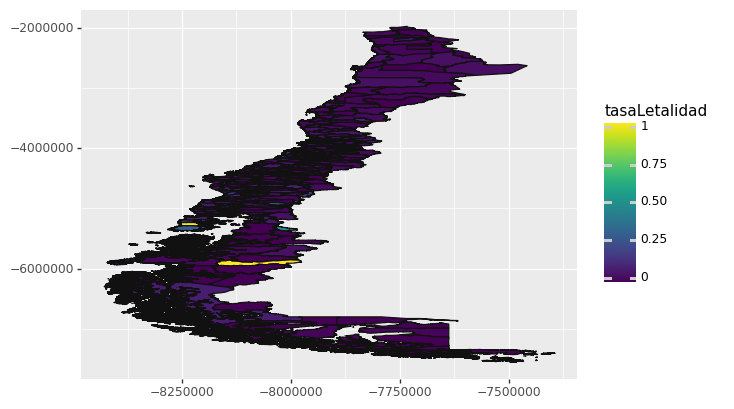

<ggplot: (8773437022717)>

In [38]:
#Probamos con todo Chile, el resultado claramente no es bueno, el grafico pierde sentido.
(ggplot(grafico[grafico['Codigo region']==4], aes(fill='tasaLetalidad'))+ geom_map(tarapaca)+ geom_map(antofagasta)+ geom_map(atacama)+ geom_map(coquimbo)+ geom_map(valparaiso)+ geom_map(ohiggins)\
 + geom_map(maule)+ geom_map(biobio)+ geom_map(araucania)+ geom_map(lagos)+ geom_map(aysen)+ geom_map(magallanes)+ geom_map(metropolitana)+ geom_map(rios)+ geom_map(aricayp)+ geom_map(nuble))

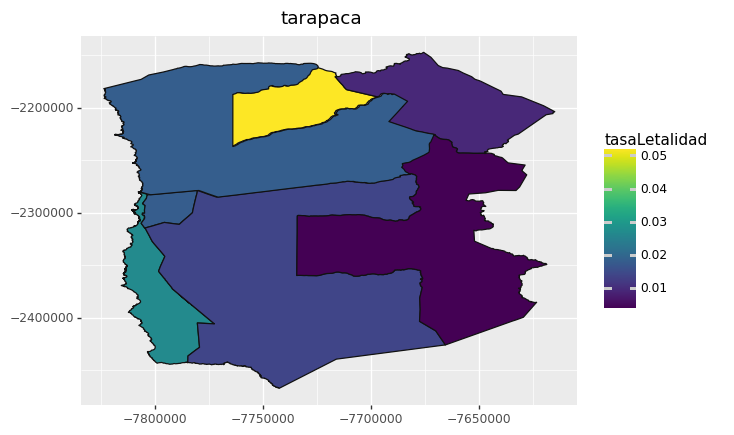

<ggplot: (-9223363263418236798)>


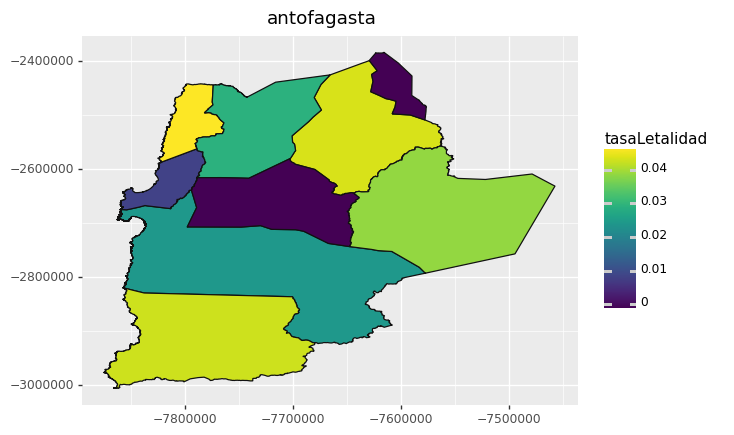

<ggplot: (8773436984226)>


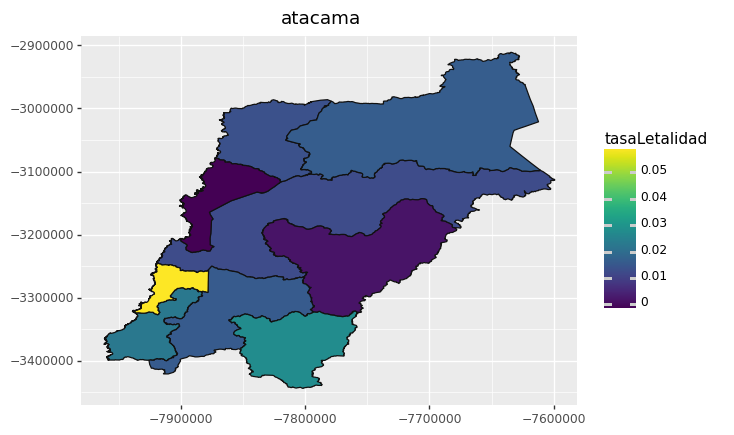

<ggplot: (-9223363263419342269)>


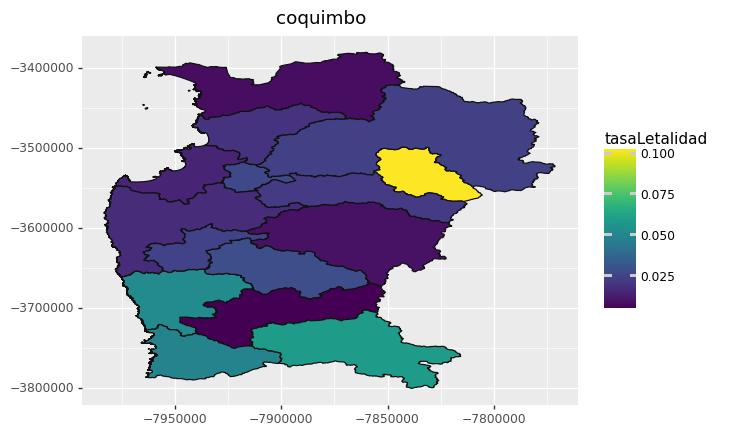

<ggplot: (-9223363263419361122)>


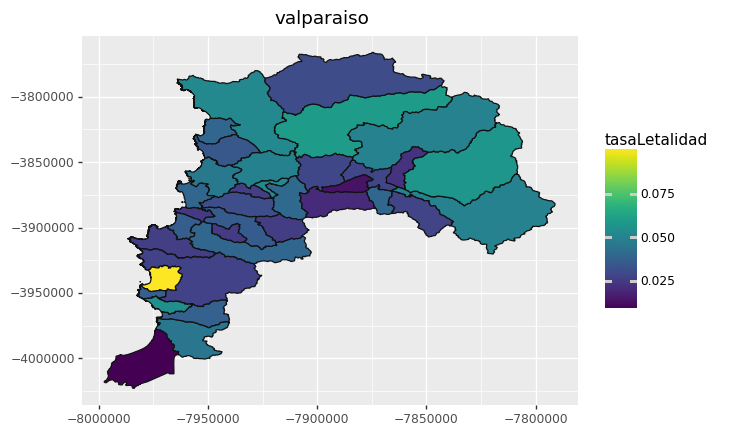

<ggplot: (8773436550141)>


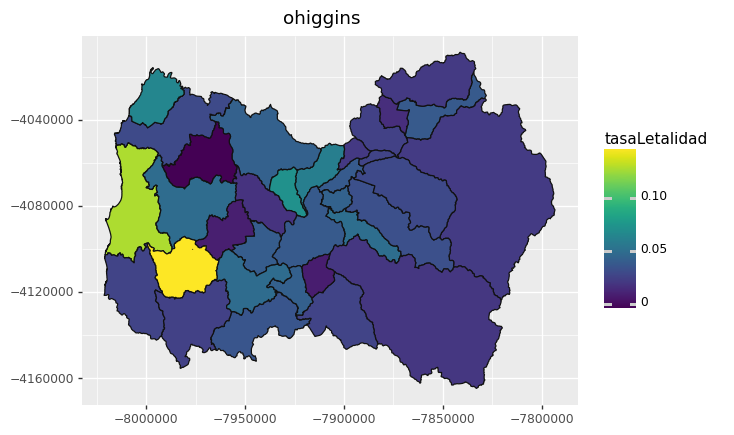

<ggplot: (8773436550141)>


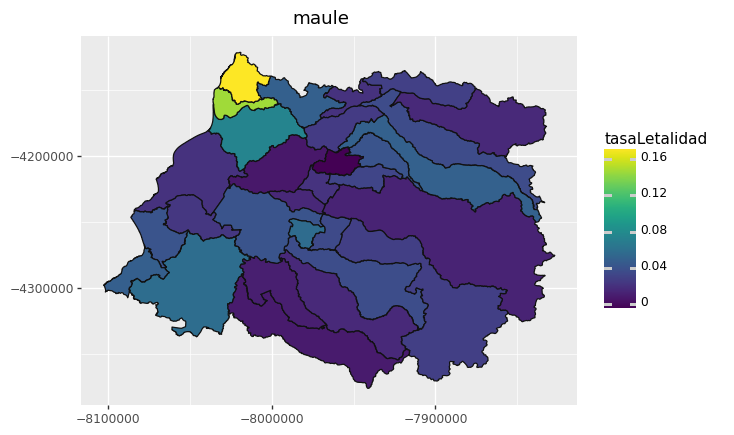

<ggplot: (-9223363263417788237)>


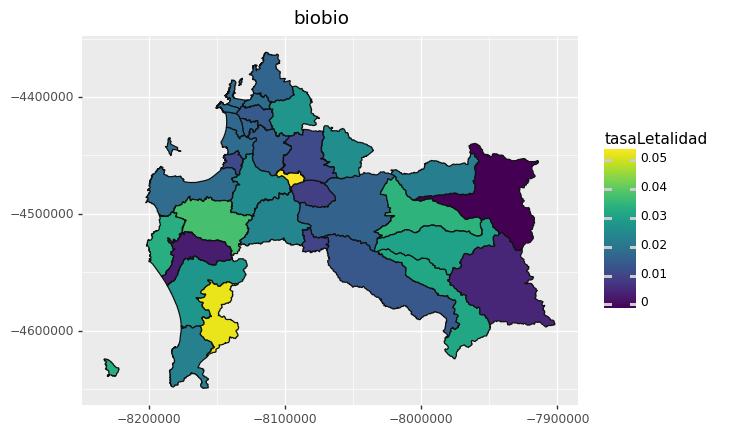

<ggplot: (-9223363263417781167)>


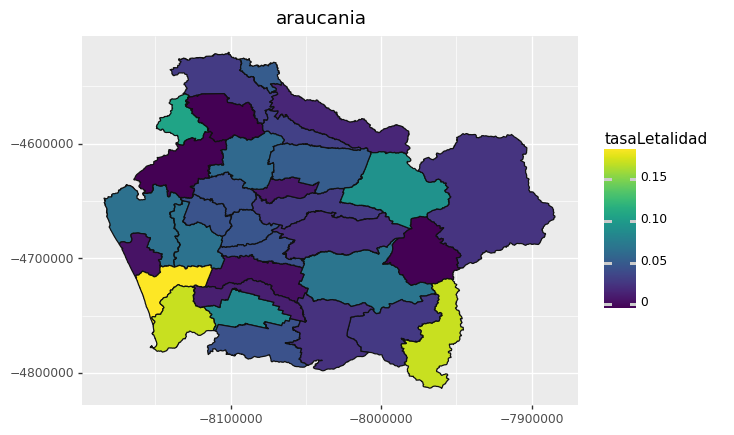

<ggplot: (-9223363263417853173)>


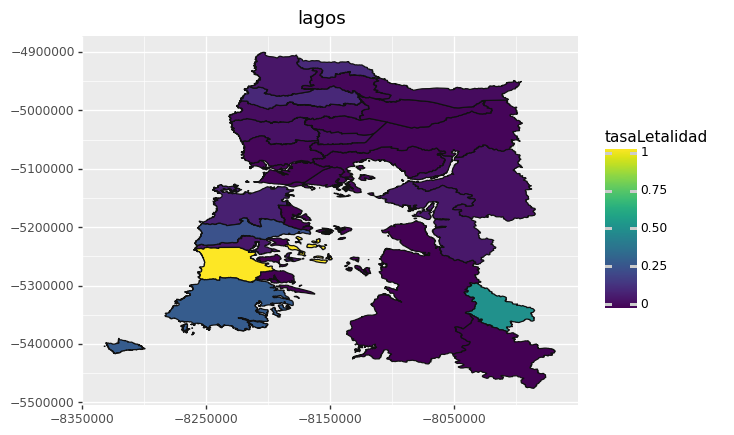

<ggplot: (8773435418695)>


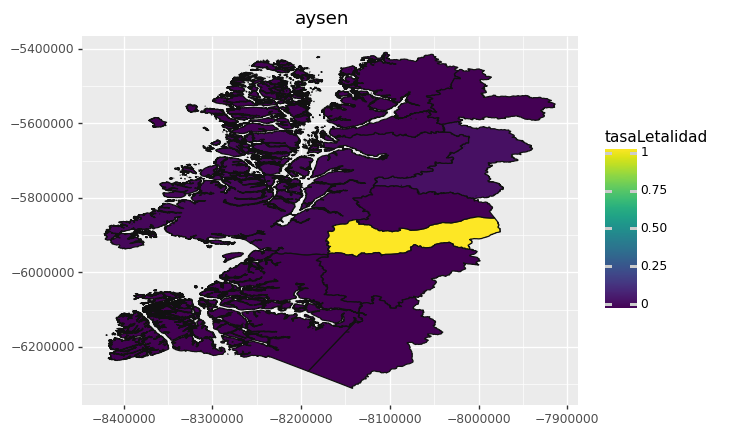

<ggplot: (8773434160199)>


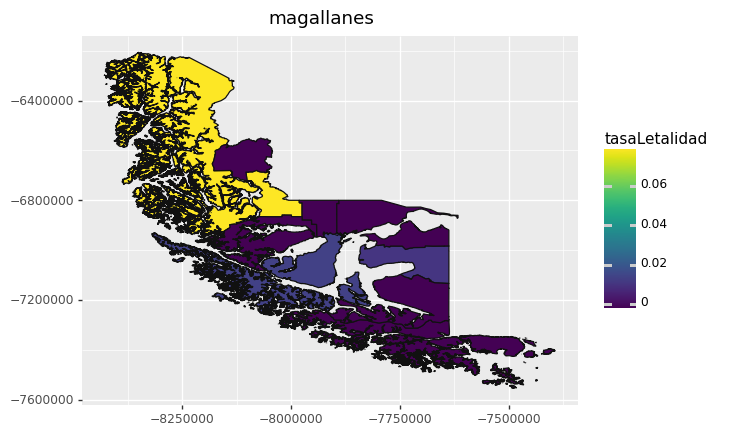

<ggplot: (8773434160241)>


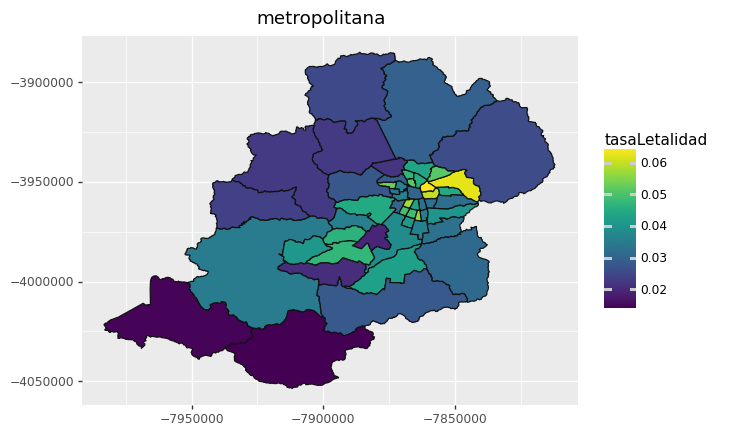

<ggplot: (-9223363263418718639)>


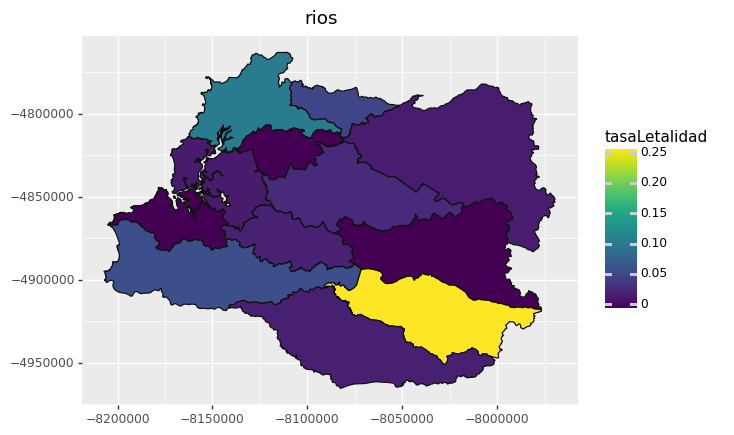

<ggplot: (-9223363263420591756)>


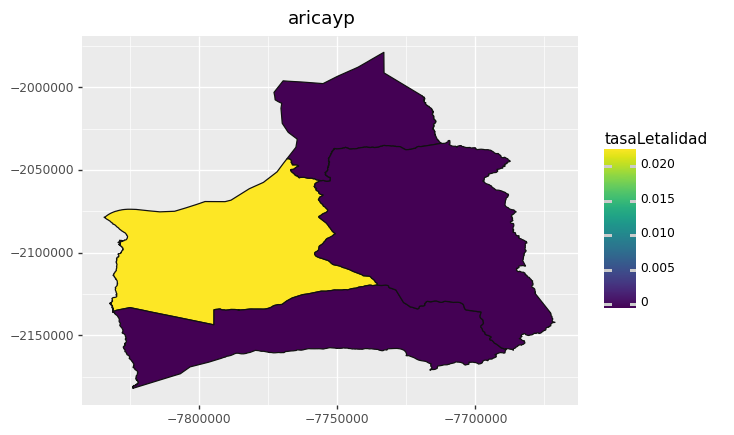

<ggplot: (-9223363263418380835)>


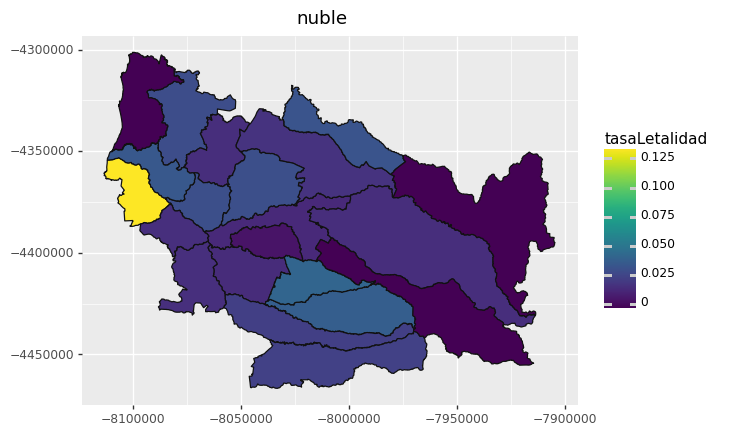

<ggplot: (-9223363263423881938)>


In [39]:
#Veamos cada region en orden desde la 1era hasta la 16va
aux=['tarapaca','antofagasta','atacama','coquimbo','valparaiso','ohiggins','maule','biobio','araucania','lagos','aysen','magallanes','metropolitana','rios','aricayp','nuble']
for i in range(17):
  j=i
  if i==16:
    break
  else:
    i=i+1
    print(ggplot(grafico[grafico['Codigo region']==i], aes(fill='tasaLetalidad'))+geom_map()+ggtitle(aux[j]))

Tras visualizar todas las regiones, se decide quedarse con aquellas que posean la mayor cantidad de muertos por COVID19. Es decir, Metropolitana, Valparaiso, Ohiggins y Antofagasta, puesto a que estas representan un ~86% del total de muertos por COVID19, ademas esta es la variable de interes de esta investigacion.

Como grupo investigador se cree que el aumento en las tasas de letalidad se debe producto al no cumplimiento de la cuarentena. En otras palabras, no respetar el no movilizarse, tanto dentro como fuera de la comuna.

Se cree esto debido a que la poblacion tiene incentivos para movilizarse, una posible razon es la necesidad de generar ingresos economicos, ya que no toda la sociedad poseia los ahorros necesarios para mantenerse adecuadamente por un tiempo prologando.

Por ello importamos datos de movilidad.

# Importacion Data MOVILIDAD

In [40]:
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto33/IndiceDeMovilidad-IM.csv'
dfm = pd.read_csv(url) #Movilidad

#crear data que tenga como columnas las comunas, y como filas los movimientos de cada dia
data = dfm.T
ncomunas = data.iloc[3,:]
data = data.rename(columns=ncomunas)
data = data.iloc[6:,:]

#agregar la fecha como una columna más
data['fecha']=data.index
data['fecha']=data['fecha'].astype('datetime64[ns]')

#agregar una fila que muestra el promedio por comuna
data = data.append(data.mean(axis=0), ignore_index=True)

#data con codigo comuna y promedio mov por comuna
promedios_mov_comuna = data.loc[data.shape[0]-1,:]
promedios_mov_comuna = pd.DataFrame(promedios_mov_comuna)
promedios_mov_comuna = promedios_mov_comuna.drop(promedios_mov_comuna.index[len(promedios_mov_comuna)-1])
promedios_mov_comuna = promedios_mov_comuna.reset_index()
promedios_mov_comuna = promedios_mov_comuna.rename(columns={'index':'cod_comuna',
                                   187:'promedio_mov'})
promedios_mov_comuna

#Ademas se visualizo como era el progreso a traves del tiempo por comuna. Por ejemplo para el caso para el caso de Punta Arenas, se ve como al comienzo de la pandamia habian altos niveles de movilidad, para luego dismuniuir
# producto de la cuarantena, y finalmente volver a aumentar ya que se levanto la cuarentena. No obstante estos graficos no se incluyeron en el analisis, puesto a que no son agradables a la vista, debido a sus ejes y excesiva
# cantidad de data.

,cod_comuna,promedio_mov
0,2101,6.15158
1,2201,4.94076
2,2302,2.74963
3,2102,5.03937
4,2202,0.713432
...,...,...
339,16108,5.98774
340,16305,6.39921
341,16207,5.88747
342,16109,1.85286


Veamos como se relaciona con nuestra tasa de letalidad.

# Grafico Letalidad x Movimiento

In [41]:
#Primero creamos los centroides para cada comuna de las regiones de interes:
com_metro=comunas[comunas['Region']=='Región Metropolitana de Santiago']
com_val=comunas[comunas['Region']=="Región de Valparaíso"]
com_ohg=comunas[comunas['Region']=="Región del Libertador Bernardo O'Higgins"]
com_anto=comunas[comunas['Region']=="Región de Antofagasta"]

In [42]:
mov_metro = pd.merge(com_metro,promedios_mov_comuna,how='left',left_on='cod_comuna', right_on='cod_comuna')
mov_val = pd.merge(com_val,promedios_mov_comuna,how='left',left_on='cod_comuna', right_on='cod_comuna')
mov_ohg = pd.merge(com_ohg,promedios_mov_comuna,how='left',left_on='cod_comuna', right_on='cod_comuna')
mov_anto = pd.merge(com_anto,promedios_mov_comuna,how='left',left_on='cod_comuna', right_on='cod_comuna')

/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.
  PlotnineWarning


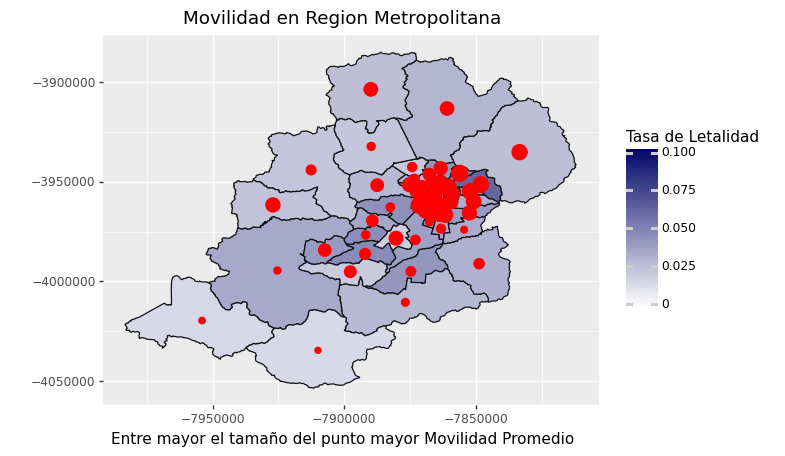

<ggplot: (-9223363263423904687)>


/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.
  PlotnineWarning


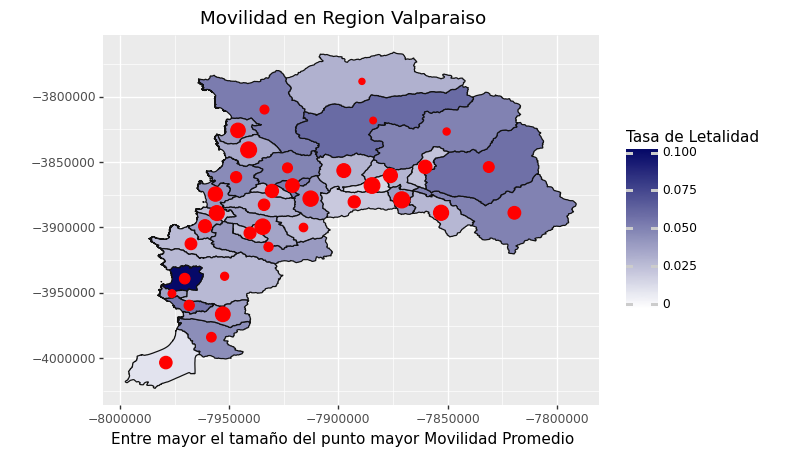

<ggplot: (-9223363263418163098)>


/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.
  PlotnineWarning


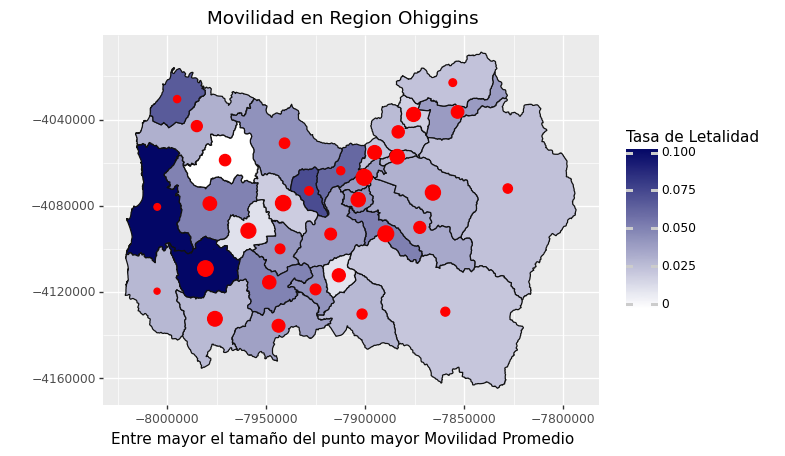

<ggplot: (-9223363263418173836)>


/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.
  PlotnineWarning


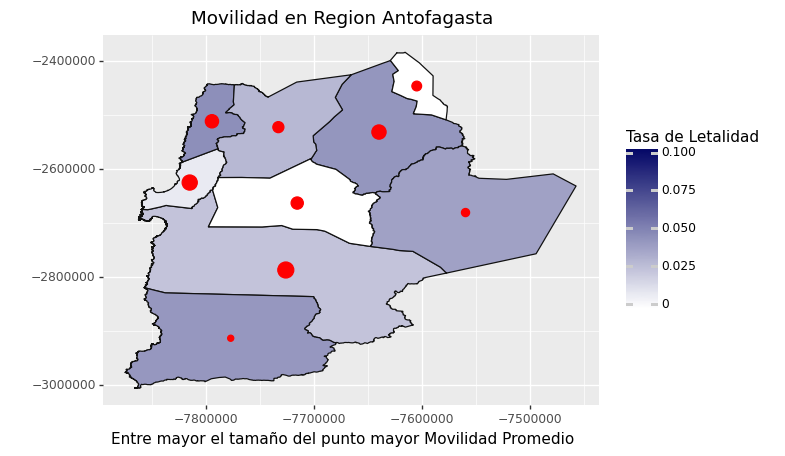

<ggplot: (8773435445049)>


In [43]:
aux1=[metropolitana,valparaiso,ohiggins,antofagasta]
aux2=[mov_metro,mov_val,mov_ohg,mov_anto]
aux3=['Movilidad en Region Metropolitana','Movilidad en Region Valparaiso','Movilidad en Region Ohiggins','Movilidad en Region Antofagasta']
for i in range(4):
  print((ggplot()+ geom_map(aux1[i],aes(fill='tasaLetalidad')))+geom_point(aux2[i], aes(x='x', y='y', size='promedio_mov'), show_legend=False, color='red')\
+ xlab("Entre mayor el tamaño del punto mayor Movilidad Promedio")+ ylab(" ") + ggtitle(aux3[i])+scale_fill_gradient(low = "#ffffff", high= "#030666", limits=(0,0.1))+labs(fill="Tasa de Letalidad"))

Hagamos focus en la provincia de Santiago:

In [44]:
focus_mov=mov_metro[mov_metro['Provincia']=='Santiago']
focus_metro=metropolitana[metropolitana['Provincia']=='Santiago']

/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.
  PlotnineWarning


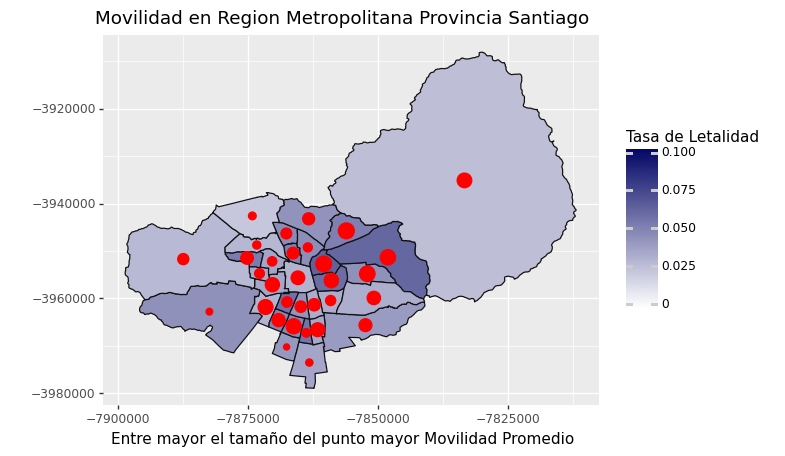

<ggplot: (8773436602295)>


In [45]:
print((ggplot()+ geom_map(focus_metro,aes(fill='tasaLetalidad')))+geom_point(focus_mov, aes(x='x', y='y', size='promedio_mov'), show_legend=False, color='red')\
+ xlab("Entre mayor el tamaño del punto mayor Movilidad Promedio")+ ylab(" ") + ggtitle('Movilidad en Region Metropolitana Provincia Santiago')\
+scale_fill_gradient(low = "#ffffff", high= "#030666", limits=(0,0.1))+labs(fill="Tasa de Letalidad"))

#Breve conclusion final:
Tras el analisis y visualizacion de la data, como grupo investigador se cree que gran parte de la sociedad chilena se ha logrado adaptar en cierta medida a esta nueva normalidad, puesto a que se ha vuelto a movilizar, pero ahora de manera segura. Esto se infiere debido a que nuestra data contempla desde el 26 de febrero hasta el 30 de agosto. Es asi como se deduce que la poblacion ha logrado tener altos niveles de movimiento pero con una baja tasa de letalidad por comuna.